
# Section 18- Pt2: Statistical Distributions


- For online-ds-pt-100719 
- study group: 01/16/20

# Learning Objectives

- PMF / PDF / CDF
- Discuss the different types of distributions and their use cases

- Practice turning math equations into functions

- Answer example questions for each type of distribution

- Normal Distribution -> Standardized Normal Distribution

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.5 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


## Probability Functions: PMF vs PDF vs CDF

### Probability Mass Function



- Converts frequency to probability of a **discrete** function
    - by normalizing so that the sum of all outcomes == 1.
- Can test what is the probability that $x$ takes on a particular value $k$
    - $P(X=k)$

- Gives probability for random discrete variables.
- "If we have x outcomes, what is the probability of getting k (our value of interest) from x?"




> The Probability Mass Function (PMF) maps a probability ($P$) of observing an outcome $x$ of our discrete random variable $X$ in a way that this function takes the form $f(x) = P(X = x)$.

- Reminder:
    $f(x) = P(X = x)$ is the same as $P(X = k)$ or $P(k)$

$X$ being a discrete random variable
the range $R_X$ is a set of all possible values of X. 
They can be represented as a set as follows:

$R_x = \{ x_1,x_2,x_3,\ldots \}$

where $x_1,x_2,x_3,\ldots$ are the possible values of $x$. 


#### Expected Value and Variance

When talking about distributions, there will generally be two descriptive quantities you're interested in: the **expected value** and the **Variance**. For discrete distributions, the expected value of your discrete random value X is given by:

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

The variance is given by:

$$ E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$


Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
13
dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


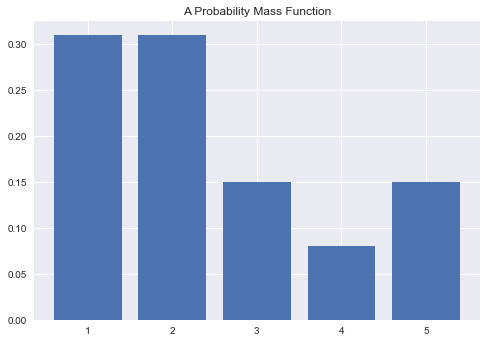

In [16]:
# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

plt.bar(counter.keys(), pmf);
plt.title("A Probability Mass Function");

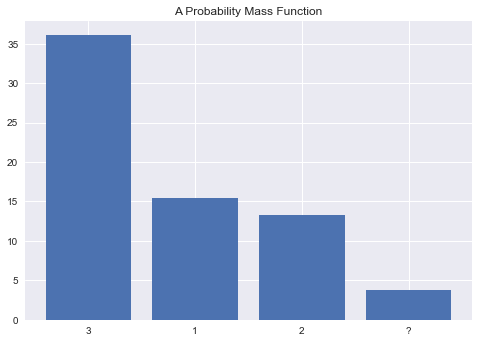

In [17]:
import collections

counter = collections.Counter(df['Pclass'])

# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
# print(counter.keys(), pmf)
plt.bar(counter.keys(), pmf);
plt.title("A Probability Mass Function");

### Probability Density Function

> The PDF is the continuous analog to the PMF


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-probability-density-function-online-ds-ft-100719/master/images/weather_NYC_21_red.png" width ="400">


- Continuous data has infinitely smaller and smaller gradations.
- Consequently, we cannot get an estimate for any individual X-value (like temperature will be 80).
$$P(\text{Temp}=80)$$

- Instead, we must take the area under the curve for a range of points.

$$P( 79.9 < \text{Temp} < 80.1 )$$



 The main takeaway here is that you simply can't use the same summation expression because $P(X=x_i) = 0$ for any $x_i$.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-probability-density-function-online-ds-ft-100719/master/images/pdf2.jpg">

The formal mathematical representation for calculating an area under the curve is given by:

$$ P(a \leq x \leq b) = \int_a^b f(x) dx \geq 0 $$

> To obtain a probability of observing a value in an interval $[a,b]$, you can use an integral (which gives you the area under the curve) from a to b using your PDF $f(x)$ 



#### Expected Value and Variance

$$ E(X) = \mu = \int_{- \infty}^{+ \infty} p(x)x dx$$
$$ E((X-\mu)^2) = \sigma^2  = \int_{- \infty}^{+ \infty} p(x)(x-\mu)^2 dx$$



In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
url='https://raw.githubusercontent.com/jirvingphd/dsc-probability-density-function-online-ds-ft-100719/master/weight-height.csv'
df = pd.read_csv(url)
display(df.head())
df.describe()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


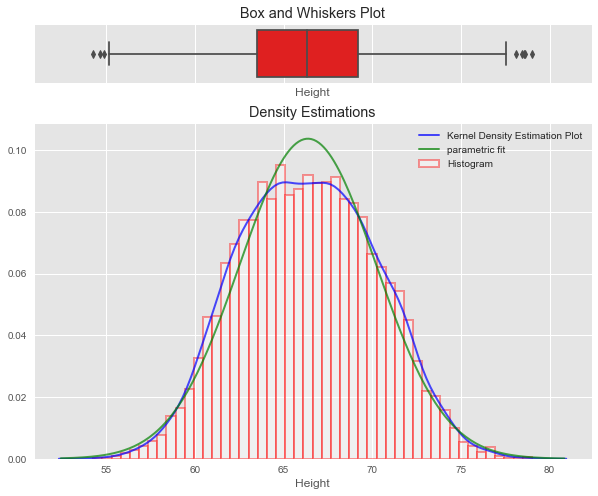

In [19]:
def kde_boxplot(x):
    import scipy.stats as stats
    # Create two vertical subplots sharing 15% and 85% of plot space
    # sharex allows sharing of axes i.e. building multiple plots on same axes
    fig, (ax, ax2) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios": (.15, .85)},
                                  figsize = (10,8) )
    sns.distplot(x, 
                hist=True, hist_kws={
                                    "linewidth": 2,
                                    "edgecolor" :'red',
                                    "alpha": 0.4, 
                                    "color":  "w",
                                    "label": "Histogram",
                                    },
                kde=True, kde_kws = {'linewidth': 2,
                                    'color': "blue",
                                    "alpha": 0.7,
                                    'label':'Kernel Density Estimation Plot'
                                    },
                fit= stats.norm, fit_kws = {'color' : 'green',
                                            'label' : 'parametric fit',
                                            "alpha": 0.7,
                                            'linewidth':2},
                ax=ax2)
    ax2.set_title('Density Estimations')

    sns.boxplot(x=x, ax = ax,color = 'red')

    ax.set_title('Box and Whiskers Plot')
    # ax2.set(ylim=(0, .08))
    # plt.ylim(0,0.11)
    plt.legend();

kde_boxplot(df['Height'])

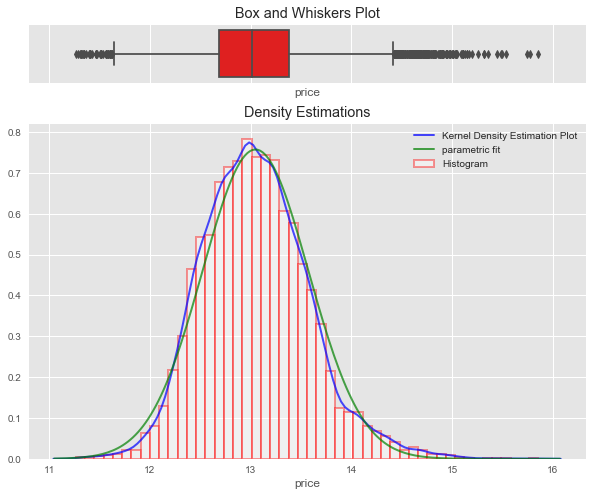

In [20]:
dfh=fs.datasets.load_mod1_proj()
dfh.dropna(subset=['price'],inplace=True)
kde_boxplot(np.log(dfh['price']))


#### Density Estimation and Plotting

As you've seen before, a density plot is a "smoothed" version of a histogram estimated from the observations. To estimate a density function from given continuous data, you can use parametric or non-parametric methods. 

**Parametric methods** use parameters like mean and standard deviation of given data and attempt to work out the **shape** of the distribution that the data belongs to. These may implement maximum likelihood methods to fit a distribution to the given data. You'll learn more about this later.

**Kernel density estimation** or KDE is a common non-parametric estimation technique to plot a curve (the kernel) at every individual data point. These curves are then added to plot a smooth density estimation. The kernel most often used is a Gaussian (which produces a bell curve at each data point). Other kernels can be used in special cases when the underlying distribution is not normal. 

In the image above, the histogram (left) and kernel density estimate (right) are constructed using the same data.

### Cumulative Distribution Function

- With large sample space $S$ (# of possible outcomes) for values of $X$, too hard to visualize with pmf
- maps a value from its percentile rank for **discrete** functions
- calculated as the $$F(x) = P(X \leq x)$$


The CDF is a function of $x$ just like a PMF or a PDF, where $x$ is any value that can possibly appear in a given distribution. To calculate the $CDF(x)$ for any value of $x$, we compute the proportion of values in the distribution less than or equal to $x$ as follows:


> The Cumulative Distribution Function, CDF, gives the probability that the variable $X$ is less than or equal to a certain possible value $x$. 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-cumulative-distribution-function-online-ds-ft-100719/master/images/cdfs_dice_nyc_2.png">



#### Kernel Density Estimation 
- Non-parametric estimation to plot a curve at every individual data point (kernels)
- Added together to plot smooth density estimation ( most common kernel is Gaussian)
- Below example histogram and kde are from the same data
<img src="https://www.dropbox.com/s/vrgcphxmry5148l/Comparison_of_1D_histogram_and_KDE.png?raw=1" width=400>



## Distributions: Discrete vs Continuous 


- **Continuous vs Discrete Distributions & their probability functions**
<img src="https://www.dropbox.com/s/7qooiy76s3jvcr1/pmf_pdf.png?raw=1" width=400>
<img src="https://www.dropbox.com/s/ovrzewnefk2qc97/exp-var.png?raw=1" width=400>


# Types of Distributions

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-stat-distributions-use-cases-online-ds-ft-100719/master/images/dists.png" width=700>

- **Continuous vs Discrete Distributions & their probability functions**
<img src="https://www.dropbox.com/s/7qooiy76s3jvcr1/pmf_pdf.png?raw=1" width=400>
<img src="https://www.dropbox.com/s/ovrzewnefk2qc97/exp-var.png?raw=1" width=400>


### Distribution descriptions  in words
**_Binomial Distribution_**: "I flip a fair coin 5 times. What are the chances that I get heads 0 times? 1 time? 2 times? Etc..."

**_Negative Binomial Distribution_**: I flip a fair coin 5 times. What are the chances it takes me two flips to get heads twice? How about 3 flips to get heads twice? 4 Flips? Etc...

The **_Exponential Distribution_** describes the probability distribution of the amount of time it may take before an event occurs.  In a way, it solves the inverse of the problem solves by the Poisson Distribution.

The **_Poisson Distribution_** lets us ask how likely any given number of events are over a set interval of time.  

The **_Exponential Distribution_** lets us ask how likely the _length of an interval of time_ is before an event occurs exactly once. 

Another way to think of the Exponential Distribution is as the continuous analogue of the **_Geometric Distribution_**. 

### Discrete Distributions


#### Bernoulli Distribution / Binomial Distribution
- Probability of $x$ successes in $n$ trials for Bernoulli/binomial variable (binary outcome)
    - Described by only one parameter $p$
- For binomial *trial*: $Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$
- For binomial *distribution*, events are independent. 
$$ P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 

#### Geometric Distribution
- Geometric = Repeated trials, but examines the probability that the first success will occur on trial n.

#### Poisson
- Represents the probability of $n$ events in a given time period when the rate of occurrence is constant

#### Uniform
- All outcomes are equally likely. 
- BOTH continuous AND discrete


### Continuous Distributions


#### Normal Distribution


- Key characteristics of the normal distribution:
    * Normal distributions are symmetric around their mean.
    * mean = median = and mode of a normal 
    * area under curve is equal to 1.0
    * denser in the center and less dense in the tails
    * defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


* Around 68% of the area of a normal distribution is within _one standard deviation_ of the mean 
($(\mu-\sigma)$ to $(\mu + \sigma)$)
* Approximately 95% of the area of a normal distribution is within two standard deviations of the mean ($(\mu-2\sigma)$ to $(\mu + 2\sigma)$).



##### Normal Density Function
- Density of normal distribution for given value of x
- Can describe from its center and spread
$$y = \frac{1}{\sigma \sqrt{2}{2\pi}}e^{\frac{{(x -\mu)}{^2}}{2 \sigma ^{2}}}$$
- $\mu$ = mean
- $\sigma$ = standard deviation
- $\pi \approx 3.14159$
- $e \approx 2.71828$


In [ ]:
import numpy as np
import seaborn as sns

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.distplot(s);

#### Standardized Normal Distribution


#### Z-score

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\dfrac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation



<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-standard-normal-distribution-online-ds-ft-100719/master/images/snorm.png" width=500></center>

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-standard-normal-distribution-online-ds-ft-100719/master/images/cdf_stnormal.png" width=500></center>

In [ ]:
import numpy as np
import seaborn as sns

fig,ax= plt.subplots(ncols=2, figsize=(10,4))
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10, 2 # dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)

ax[0].set_title('Raw')
sns.distplot(d1,ax=ax[0]);
sns.distplot(d2,ax=ax[0]);

ax[1].set_title('Standardized')
sns.distplot([(x - d1.mean())/d1.std() for x in d1],ax=ax[1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2], ax=ax[1]);

## Distribution Characteristics


#### Skewness

- Symmetrical distribution: skewness = 0
- **Fisher-Pearson Coefficient of skewess:**
$$∑ N_{i=1} \frac{{(Yi−\bar{Y})}^3}{N} / {\sigma^3}$$
- Rules of thumb
    - Symmetrical-ish: -0.5 to +.05
    - Moderate Skew:
        - Negative skew: -1 to -0.5
        - Positive skew: +0.5 to +1
    - Highly skewed:
        - Less than -1
        - Greater than +1
    

<img src="https://www.dropbox.com/s/mqr3kux0caa64nk/skew1.jpeg?raw=1">



#### Kurtosis 




- Lengths of tails of distribution to describe extreme values (outliers)
- Univariate kurtosis:
$$\Sigma N_{i=1} \frac{{(Yi−\bar{Y})}^4}{N} / {\sigma^4}$$

- **Mesokurtic:**
    - Kurtosis similar to standard normal distribution
- **Leptokurtic (Kurtosis >3)**
    - Tails are fatter, peak is higher sharper
    - Data are heavy-tailed or many outliers
- **Platykurtic: (Kurtosis < 3)**
    - Shorter peak, tails are thinner than the normal distribution. 
    - Data are light-tailed or lack of outliers vs normal dist
<img src="https://www.dropbox.com/s/5ynsy7vkb196ilb/kurt2.jpg?raw=1" width=300>

___

# 🗓Section 18 Pt2L Statistical Testing

## Statistical Testing with Z-scores and p-values

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=400>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/rep_sample.png" width=600>

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400>

In [ ]:
# Z-table in Python 
import scipy.stats as stats

# Probabilities up reto z-score of 1.5
print(stats.norm.cdf(1.5))

# Probabilities greater than z-score of 1.34
print (1-stats.norm.cdf(1.34))

# OLD

In [5]:
from ipywidgets import interact
@interact
def plot_hist(col=dfm.columns):
    import scipy as sp
    import numpy as np    
    

    # print(np.random.get_state())
    mu, sigma = dfm[col].mean(), dfm[col].std()
    n = len(dfm[col])
    s = np.random.normal(mu, sigma, n)
    
    
    fig,ax =plt.subplots(ncols=2,figsize=(10,4))

    sns.distplot(dfm[col],rug=True,ax=ax[0])
    sns.distplot(s,ax=ax[1],rug=True)
#     ax[0].get_figure().set_size_inches(10,5)

    ax[0].set(title=col,ylabel='Frequency')

    ax[1].set(title='Generated');
#     ax[1].set(title='True')
    
#     ax[0].hist(s,bins=20,edgecolor='black')
#     ax[1].hist(dfm[col],bins=20,edgecolor='black')



interactive(children=(Dropdown(description='col', options=('mpg', 'cylinders', 'displacement', 'horsepower', '…

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

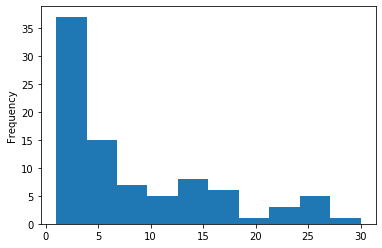

In [7]:
df['Age'].value_counts(normalize=False, dropna=True).plot(kind='hist')#.sort_index()#.hist(bins='auto')#.plot(kind='bar')

In [8]:
df['Age'].dropna(inplace=True)#.fillna('999',inplace=True)
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [9]:
df.select_dtypes('object')

,Pclass,Name,Sex,Ticket,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,3,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,211536,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,1,"Behr, Mr. Karl Howell",male,111369,C148,C


In [10]:
df['Age'] = df['Age'].astype(float)

[Text(0, 0.5, '%?'), Text(0.5, 0, ''), Text(0.5, 1.0, 'Histogram')]

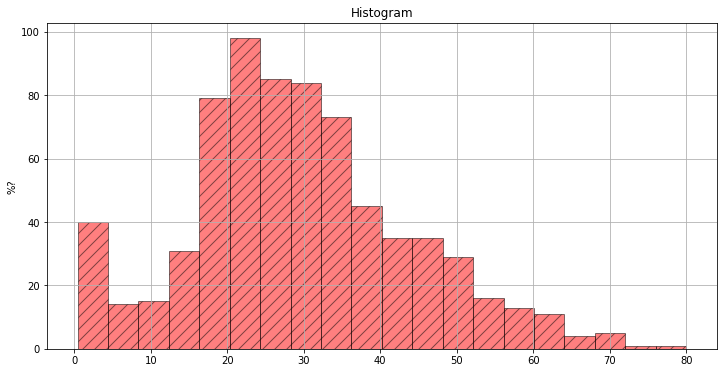

In [11]:
ax = df['Age'].hist(
    bins='auto',
    **{
        'color':'red',
        'edgecolor':'black',
        'hatch':'//', 
        'alpha':0.5})

fig = ax.get_figure()
fig.set_size_inches(12,6)

ax.set(title='Histogram',
      ylabel='%?',
      xlabel='')





In [ ]:
display_params = {'display.max_rows':0,
                  'display.max_info_rows':0,
                  'display.chop_threshold':0}
    
[pd.set_option(k,v) for k,v in display_params.items()]
[print(k,' = ',pd.get_option(k)) for k in display_params];



In [ ]:
df_fig = fs.jmi.get_methods_attributes_df(fig)

In [ ]:
# ax.set

In [ ]:
# df_fig[ 
#     df_fig['Object'].apply(lambda x: 'get' in x)
# ]

In [ ]:
df['Fare'].hist(bins='auto')